# KNN Iris Replication
A replication of Tavish Srivastava's "Introduction to k-Nearest Neighbors: Simplified (with implementation in Python)"
https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/

In [94]:
import pandas as pd
import numpy as np
import math
import operator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from scipy.stats import sem
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#import and check out data
data = pd.read_csv('iris.csv')

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
#split data
X = data.iloc[:,0:4]
y = data.iloc[:,4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [52]:
#KNN algorithm

def individual_KNN(data, X_train, y_train, k=5):
    dist = np.sqrt(np.square(X_train - data).sum(axis=1))
    dist = pd.DataFrame({'dist': dist, 'y': y_train})
    dist = dist.sort_values(by=['dist'])
    top_k = dist.iloc[0:k]
    return top_k['y'].value_counts().idxmax()

In [55]:
def predict(X_test, X_train, y_train, k=5):
    y_predict = []
    for ind, row in X_test.iterrows():
        y_predict.append(individual_KNN(row, X_train, y_train, k))
        
    return y_predict

In [57]:
y_predict = predict(X_test, X_train, y_train)
pd.DataFrame({'predict': y_predict, 'actual': y_test})

,actual,predict
72,Iris-versicolor,Iris-virginica
16,Iris-setosa,Iris-setosa
73,Iris-versicolor,Iris-versicolor
105,Iris-virginica,Iris-virginica
142,Iris-virginica,Iris-virginica
143,Iris-virginica,Iris-virginica
65,Iris-versicolor,Iris-versicolor
119,Iris-virginica,Iris-virginica
30,Iris-setosa,Iris-setosa
126,Iris-virginica,Iris-virginica


In [62]:
accuracy_score(y_test, y_predict)

0.93333333333333335

## Adding in K-Folds Cross Validation

In [86]:
def kfolds_KNN(X, y, k):
    accuracies = []

    kf = KFold(n_splits = 5)

    for train_index, test_index in kf.split(X):
        X_train = X.loc[train_index]
        X_test = X.loc[test_index]
        y_train = y.loc[train_index]
        y_test = y.loc[test_index]

        y_predict = predict(X_test, X_train, y_train, k)
        accuracies.append(accuracy_score(y_test, y_predict))
    
    return pd.DataFrame({'k': [k], 'accuracy_score': [np.mean(accuracies)], 'sem': [sem(accuracies)]})

In [98]:
df = pd.DataFrame({'k': [], 'accuracy_score': [], 'sem': []})
for k in range(1,15):
    df = df.append(kfolds_KNN(X, y, k))

df

,accuracy_score,k,sem
0,0.926667,1.0,0.033993
0,0.906667,2.0,0.048762
0,0.906667,3.0,0.046428
0,0.906667,4.0,0.046428
0,0.913333,5.0,0.041633
0,0.906667,6.0,0.046428
0,0.920000,7.0,0.042947
0,0.913333,8.0,0.044222
0,0.920000,9.0,0.045461
0,0.920000,10.0,0.045461


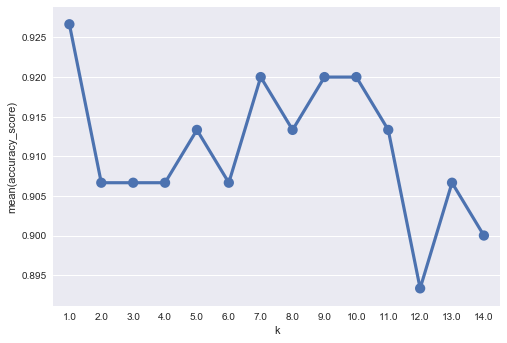

In [99]:
ax = sns.pointplot(x="k", y="accuracy_score", data=df)
plt.show()